ANR: **924823**

In [10]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

In [25]:
%config IPCompleter.greedy=True

In [12]:
import pandas as pd

In [17]:
df = pd.read_csv('/srv/data-mining/data/IMDB/imdb.csv', index_col=None, na_values='?')
df.head(n=1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,quality
0,Color,James-Cameron,723.0,178.0,0.0,855.0,Joel-David-Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,good


In [16]:
df['gross'].head()

0    760505847.0
1    309404152.0
2    200074175.0
3    448130642.0
4            NaN
Name: gross, dtype: float64

pandas.core.series.Series

### Task 1

* Given the intuitions that you have about the features — are the datatypes correct?

Not all of them, some of them are float numbers where they could be integer.

* What is the difference between float64 and int64? Can you find what causes this for features that likely aren’t a floating point number?

Float64 includes decimal numbers that we use for continous numerical variables whereas int64 is for dicrete numerical vairables what sometimes they shows categorical vairables as factors. 

In [20]:
df['facenumber_in_poster'].head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: facenumber_in_poster, dtype: float64

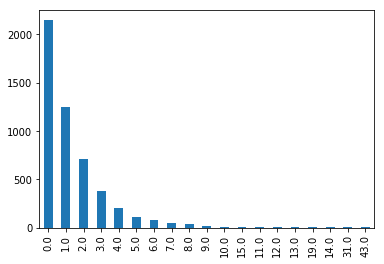

In [19]:
df['facenumber_in_poster'].value_counts().plot(kind='bar')

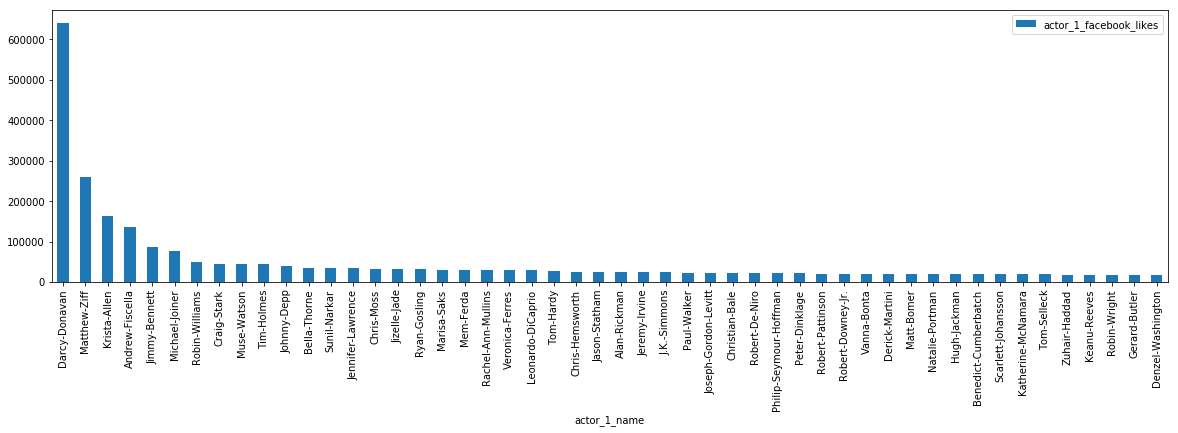

In [26]:
p_df = df.drop_duplicates('actor_1_name')
p_df = p_df.sort_values('actor_1_facebook_likes', ascending= False)
p_df = p_df.head(50)
p_df.plot(x='actor_1_name', y = 'actor_1_facebook_likes', kind= 'bar', figsize= (20,5))

### Task 2

* Look up Darcy Donavan and Matthew Ziff on IMDB. Do you think their roles would make them the most popular actors on facebook?

No, definitely not for mr. Ziff, who is a stuntman.

* Look them up on facebook. Do the likes of the plot match that of Facebook?

There is a facebook page for Darcy Donavan worths about 3.2M likes. That’s not nearly the >600M that were suggested here. Matthew only has 54K likes on facebook.


In [31]:
df[df['actor_1_name'] == 'Darcy-Donavan'][
        ['movie_title', 'actor_1_name',
     'actor_2_name', 'actor_1_facebook_likes']]

,movie_title,actor_1_name,actor_2_name,actor_1_facebook_likes
1902,Anchorman:-The-Legend-of-Ron-Burgundy-,Darcy-Donavan,Will-Ferrell,640000.0


### Task 3

* Look up the cast of Anchorman on IMDB. Where should Will Ferell be according to the IMDB ordering?

Will Ferell seems to first actor on IMDB and Darcy-Donavan is the last one in the IMDB list. 

* Are the actors perhaps ordered alphabetically?

Not actually, then Christina Applegate would have been higher.

* Are the likes for Will Ferell correct?

Will Ferrel has 1M likes which so far less than 600M, so IMDB sorting is not trusted as well. 


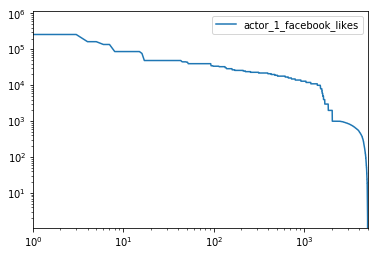

In [32]:
l_df = df['actor_1_facebook_likes'].sort_values(ascending=False)
l_df = l_df.reset_index()
l_df.plot(y='actor_1_facebook_likes', kind='line', loglog=True)

### Task 4

* Do likes follow a Zipfian distribution?

Not really, no.

* Why/whynot?

Due to this small sample, and the data mostly being biased to- wards more popular actors, there’s no ’heavy tail’ with many low frequencies.


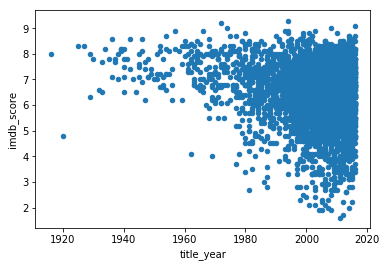

In [33]:
df.plot(kind='scatter', x='title_year', y='imdb_score')

In [34]:
from scipy.stats import pearsonr

In [35]:
corr = pearsonr(df['title_year'].fillna(0), df['imdb_score'].fillna(0)) 
print("r={0}, p={1}".format(*corr))

r=-0.15569995585608865, p=1.16534357702956e-28


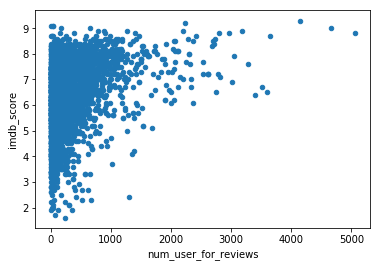

In [36]:
df.plot(kind='scatter', x='num_user_for_reviews', y='imdb_score')

In [38]:
from scipy.stats import pearsonr
corr = pearsonr(df['num_user_for_reviews'].fillna(0), df['imdb_score'].fillna(0)) 
print("r={0}, p={1}".format(*corr))

r=0.2902646752855314, p=3.2327608364230235e-98


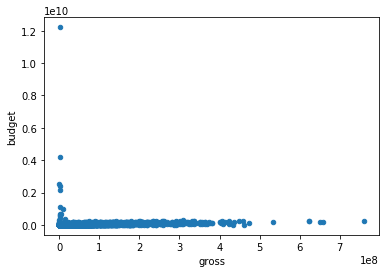

In [39]:
df.plot(kind='scatter', x='gross', y='budget')

In [40]:
from scipy.stats import pearsonr
corr = pearsonr(df['gross'].fillna(0), df['budget'].fillna(0))
print("r={0}, p={1}". format(*corr))

r=0.12326449610543841, p=1.7450053066050764e-18


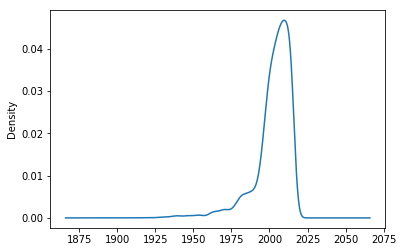

In [41]:
df['title_year'].plot(kind='kde')

In [42]:
df[df['gross'] > 6 * 1e8][['movie_title', 'gross', 'budget']
        ].sort_values('gross', ascending=False)

,movie_title,gross,budget
0,Avatar-,760505847.0,237000000.0
26,Titanic-,658672302.0,200000000.0
29,Jurassic-World-,652177271.0,150000000.0
17,The-Avengers-,623279547.0,220000000.0
794,The-Avengers-,623279547.0,220000000.0


In [43]:
df[df['budget'] > 0.2*1e10][['movie_title', 'gross', 'budget']
        ].sort_values('budget', ascending=False)

,movie_title,gross,budget
2988,The-Host-,2201412.0,1.221550e+10
3859,Lady-Vengeance-,211667.0,4.200000e+09
3005,Fateless-,195888.0,2.500000e+09
2323,Princess-Mononoke-,2298191.0,2.400000e+09
2334,Steamboy-,410388.0,2.127520e+09


### Task 5

* Look up the movies on IMDB, do you notice something about their movie posters?

The “‘most expensive movies”’ are South Korean, Hungarian and Japanese movies.

* Why are these movies generating outliers?

The budget feature for IMDB lists local currency so it will make results misleading.

* How would you tackle this?

We need to find the appropriate soure to convert all the currencies sth universal like dollar.


In [44]:
df.replace({"quality": {"very-bad": 1, "bad": 2, "okay": 3,
                                             "good": 4, "very-good": 5}}, inplace=True)
df.pivot_table(index='quality', columns='country',
                            values='budget').style.background_gradient(cmap='Blues')


### Task 6

* Which genre overall gets best reviews?

Documentaries seems the best in terms of decent reviews.

* Look at the second plot. For this particular genre, what can you deduce from the plot?


??Seems like that a very particular crowd reviews documentaries between a particular range. Which—if you think about people who watch documentaries, and in which circumstances—it makes some sense.

In [45]:
df.groupby('actor_1_name')['imdb_score'].mean().sort_values(
        ascending=False).head(10)

actor_1_name
Krystyna-Janda        9.1
Jack-Warden           8.9
Rob-McElhenney        8.8
Kimberley-Crossman    8.7
Abigail-Evans         8.7
Elina-Abai-Kyzy       8.7
Jackie-Gleason        8.7
Takashi-Shimura       8.7
Maria-Pia-Calzone     8.7
Ruth-Wilson           8.6
Name: imdb_score, dtype: float64

In [46]:
from scipy.stats.mstats import zscore
df['imdb_z'] = zscore(df['imdb_score'])
pd.Series(df.groupby('actor_1_name')['imdb_z'].sum()
         ).sort_values(ascending=False).head(10)

actor_1_name
Tom-Hanks                 20.967048
Leonardo-DiCaprio         19.656199
Harrison-Ford             17.215400
Denzel-Washington         17.105197
Christian-Bale            15.497207
Matt-Damon                14.440725
Philip-Seymour-Hoffman    14.186358
Kevin-Spacey              13.846442
Robert-De-Niro            13.298695
Tom-Cruise                13.025713
Name: imdb_z, dtype: float64

In [47]:
pd.Series(df.groupby('actor_1_name')['imdb_z'].mean()
         ).sort_values(ascending=False).head(10)

actor_1_name
Krystyna-Janda        2.361291
Jack-Warden           2.183659
Rob-McElhenney        2.094843
Takashi-Shimura       2.006028
Kimberley-Crossman    2.006028
Jackie-Gleason        2.006028
Abigail-Evans         2.006028
Elina-Abai-Kyzy       2.006028
Maria-Pia-Calzone     2.006028
Bunta-Sugawara        1.917212
Name: imdb_z, dtype: float64

In [48]:
df['plot_keywords'].head(5)

0               avatar|future|marine|native|paraplegic
1    goddess|marriage-ceremony|marriage-proposal|pi...
2                  bomb|espionage|sequel|spy|terrorist
3    deception|imprisonment|lawlessness|police-offi...
4                                                  NaN
Name: plot_keywords, dtype: object

In [49]:
df['plot_keywords'] = df['plot_keywords'].fillna(' ')

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500)
pd.DataFrame(cv.fit_transform(df['plot_keywords']).todense(),
             columns=sorted(cv.vocabulary_))

,1950s,1960s,1970s,1980s,1990s,19th,abuse,accident,action,actor,...,woods,word,worker,world,writer,written,year,york,young,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df['gross'].head(5)

0    760505847.0
1    309404152.0
2    200074175.0
3    448130642.0
4            NaN
Name: gross, dtype: float64

In [54]:
from sklearn.preprocessing import Imputer 
imp = Imputer(strategy='mean', axis=1)
df['gross'] = imp.fit_transform([df['gross']])[0]

In [55]:
df['gross'] = df['gross'].fillna(df['gross'].mean())

In [57]:
df['genres'].value_counts()[:1].index[0]

'Drama'

In [60]:
for column, dtype in df.dtypes.to_dict().items(): # for each column, dtype pair in the dataframe
    if dtype == 'object': # if the column is an object (thus discrete)
        df[column] = df[column].fillna(df[column].value_counts()[:1].index[0]) # fill with most common 
        cats = df[column].astype('category') # convert to category
        df[column] = cats.cat.codes # use the category indices to convert to numeric
    else: # if the column is something else (thus numeric)
        df[column] = df[column].fillna(df[column].mean()) # take the mean

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df.pop('quality')
X = scaler.fit_transform(df)

In [62]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
ˆy_baseline = [y.value_counts()[:1].index[0]] * len(y)

In [64]:
from sklearn.metrics import classification_report 
print(classification_report(y, ˆy_baseline))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        41
          2       0.00      0.00      0.00       441
          3       0.55      1.00      0.71      2774
          4       0.00      0.00      0.00      1445
          5       0.00      0.00      0.00       328

avg / total       0.30      0.55      0.39      5029



In [65]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train, y_train)
ˆy_test = lr.predict(X_test)

In [66]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, ˆy_test))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         7
          2       0.85      0.35      0.50       114
          3       0.82      1.00      0.90       690
          4       0.85      0.77      0.81       354
          5       0.87      0.48      0.62        93

avg / total       0.83      0.83      0.81      1258



In [67]:
list(zip(df.columns[:-1], lr.coef_[2]))

[('color', 0.078501650488499192),
 ('director_name', -0.054427707227774173),
 ('num_critic_for_reviews', 0.48732240569494772),
 ('duration', 0.036923561332934986),
 ('director_facebook_likes', -0.064750379234629715),
 ('actor_3_facebook_likes', -0.018900795994929113),
 ('actor_2_name', -0.0093693176241940769),
 ('actor_1_facebook_likes', -0.48949642802034365),
 ('gross', 0.28197414771894952),
 ('genres', -0.21371797574486548),
 ('actor_1_name', -0.059540965010219826),
 ('movie_title', 0.043149824303671806),
 ('num_voted_users', -1.1081563456673371),
 ('cast_total_facebook_likes', 0.72221835814680302),
 ('actor_3_name', -0.013869506773889177),
 ('facenumber_in_poster', 0.10981875988953653),
 ('plot_keywords', 0.01646134576911774),
 ('movie_imdb_link', -0.3039193631372562),
 ('num_user_for_reviews', -0.16471349600471291),
 ('language', -0.091869507622466845),
 ('country', 0.14183705697690333),
 ('content_rating', 0.0061635025393678867),
 ('budget', -0.016266987962295424),
 ('title_year',

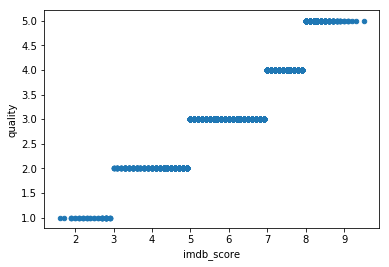

In [68]:
  pd.concat([df['imdb_score'], y], axis=1).plot(kind='scatter', x='imdb_score', y='quality')


### Task 7

* What is happening here?

Hopefully, with this you will see that quality is actually based on imdb_score: 1-3=1,3-5=2,5-7=3,7-8=4,8-10=5. Themodel will see this, and use this feature. Given that it’s just a derivation from imdb_score, we don’t want to use it, as it is a case of feature contamination / pollution.

* Try removing the polluting feature with del df[’featurename’] and run the experiments again.

expectation is getting lower scores.